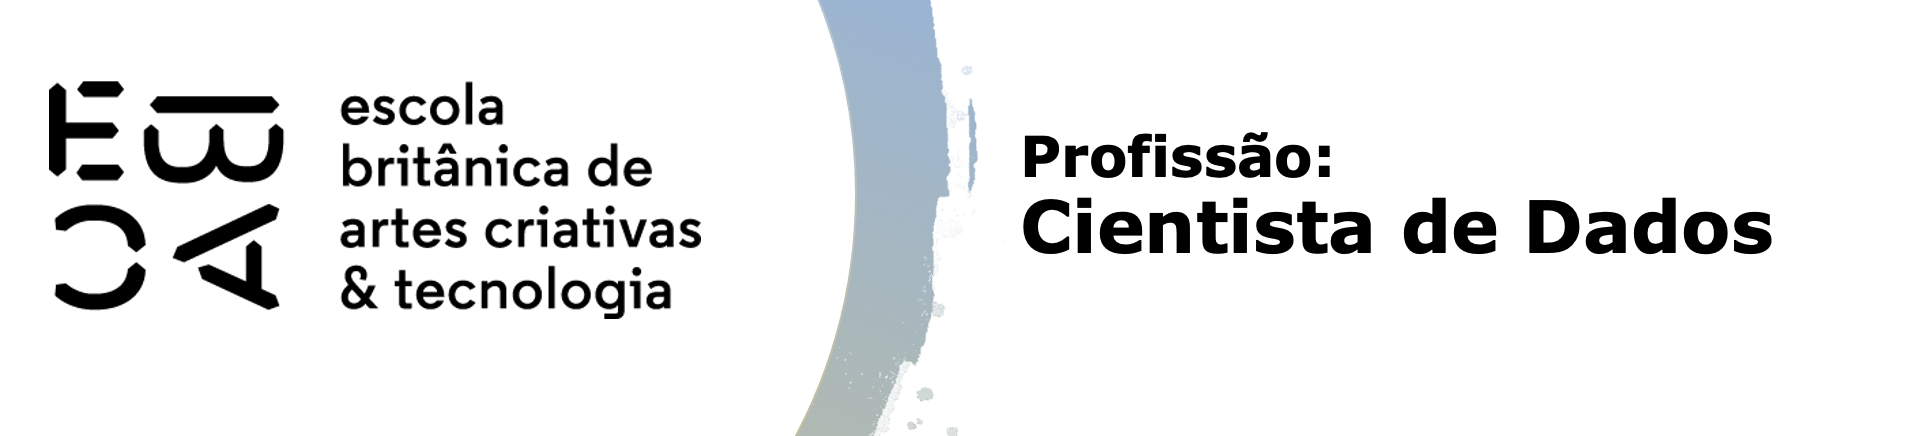

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold

In [28]:
x_train_df = pd.read_csv("uci_har_dataset/train/X_train.txt", header=None, delim_whitespace=True)
x_test_df = pd.read_csv("uci_har_dataset/test/X_test.txt", header=None, delim_whitespace=True)
y_train_df = pd.read_csv("uci_har_dataset/train/y_train.txt", header=None, delim_whitespace=True)
y_test_df = pd.read_csv("uci_har_dataset/test/y_test.txt", header=None, delim_whitespace=True)
X_train = pd.read_csv("uci_har_dataset/x_train.csv", index_col=["order", "subject_train"], sep=",")
X_test = pd.read_csv("uci_har_dataset/x_test.csv", index_col=["order", "subject_test"], sep=",")

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [29]:
# %%time
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_df, test_size=.25, random_state=2360873)
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(X_train, y_train)
variaveis_com_maior_importancia = []

feature_importances = clf.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrando as 3 variáveis mais importantes
top_3_features = feature_importance_df.head(3)
top_3_features["Feature"].values.tolist()

['tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [30]:
# %%time
columns = ['tGravityAcc-energy()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']
X_train = pd.DataFrame(X_train, columns=columns)

clf = DecisionTreeClassifier(random_state=2360873)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

kf = KFold(n_splits=10, shuffle=True, random_state=2360873)

clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=kf, verbose=100)
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 23 candidates, totalling 230 fits
[CV 1/10; 1/23] START ccp_alpha=0.0.............................................
[CV 1/10; 1/23] END ..............ccp_alpha=0.0;, score=0.870 total time=   0.0s
[CV 2/10; 1/23] START ccp_alpha=0.0.............................................
[CV 2/10; 1/23] END ..............ccp_alpha=0.0;, score=0.846 total time=   0.0s
[CV 3/10; 1/23] START ccp_alpha=0.0.............................................
[CV 3/10; 1/23] END ..............ccp_alpha=0.0;, score=0.864 total time=   0.0s
[CV 4/10; 1/23] START ccp_alpha=0.0.............................................
[CV 4/10; 1/23] END ..............ccp_alpha=0.0;, score=0.871 total time=   0.0s
[CV 5/10; 1/23] START ccp_alpha=0.0.............................................
[CV 5/10; 1/23] END ..............ccp_alpha=0.0;, score=0.875 total time=   0.0s
[CV 6/10; 1/23] START ccp_alpha=0.0.............................................
[CV 6/10; 1/23] END ..............ccp_alpha=0.

GridSearchCV(cv=KFold(n_splits=10, random_state=2360873, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.        , 0.00016121, 0.00016927, 0.00017547, 0.00017947,
       0.0001844 , 0.0002348 , 0.0002641 , 0.00028211, 0.00030926,
       0.00032644, 0.00033711, 0.00037315, 0.00041214, 0.00046707,
       0.0005212 , 0.00060159, 0.00074301, 0.00087587, 0.00109959,
       0.00168403, 0.00248857, 0.00645726])},
             verbose=100)

In [31]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017462,0.002313,0.003369,0.000297,0.0,{'ccp_alpha': 0.0},0.869565,0.846014,0.864130,0.871377,0.874773,0.867514,0.863884,0.878403,0.883848,0.847550,0.866706,0.011559,18
1,0.016608,0.000279,0.003201,0.000127,0.000161,{'ccp_alpha': 0.00016120581953008503},0.869565,0.846014,0.862319,0.871377,0.874773,0.869328,0.863884,0.876588,0.885662,0.847550,0.866706,0.011753,17
2,0.016658,0.000407,0.003211,0.000257,0.000169,{'ccp_alpha': 0.00016926611050658934},0.867754,0.846014,0.862319,0.869565,0.874773,0.869328,0.863884,0.876588,0.885662,0.849365,0.866525,0.011375,19
3,0.016597,0.000541,0.003169,0.000144,0.000175,{'ccp_alpha': 0.0001754745948209604},0.867754,0.846014,0.862319,0.869565,0.874773,0.869328,0.865699,0.876588,0.885662,0.847550,0.866525,0.011633,19
4,0.016687,0.000274,0.003209,0.000219,0.000179,{'ccp_alpha': 0.00017946741627372726},0.867754,0.846014,0.862319,0.869565,0.874773,0.869328,0.865699,0.876588,0.887477,0.847550,0.866707,0.011940,16
5,0.016833,0.000437,0.003140,0.000134,0.000184,{'ccp_alpha': 0.00018440455616414137},0.871377,0.846014,0.862319,0.869565,0.874773,0.872958,0.865699,0.876588,0.887477,0.849365,0.867614,0.011850,15
6,0.016916,0.000338,0.003245,0.000280,0.000235,{'ccp_alpha': 0.00023479978061990633},0.873188,0.851449,0.856884,0.873188,0.878403,0.876588,0.885662,0.887477,0.891107,0.851180,0.872513,0.013921,12
7,0.016963,0.000301,0.003220,0.000187,0.000264,{'ccp_alpha': 0.000264103151145033},0.873188,0.851449,0.855072,0.875000,0.882033,0.872958,0.885662,0.889292,0.894737,0.851180,0.873057,0.014986,11
8,0.017047,0.000359,0.003285,0.000223,0.000282,{'ccp_alpha': 0.0002821101841776488},0.869565,0.855072,0.860507,0.876812,0.885662,0.874773,0.891107,0.887477,0.894737,0.849365,0.874508,0.014877,8
9,0.017022,0.000346,0.003173,0.000221,0.000309,{'ccp_alpha': 0.00030926063799324206},0.873188,0.851449,0.864130,0.876812,0.883848,0.872958,0.887477,0.885662,0.891107,0.849365,0.873600,0.013886,10


In [32]:
grid.best_score_

0.8768625555643231

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [33]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

X_test = pd.DataFrame(X_test, columns=columns)
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)
acuracia_teste = clf.score(X_test, y_test_df)

print(f'Acurácia: {acuracia_teste*100:.2f}')

Acurácia: 68.71


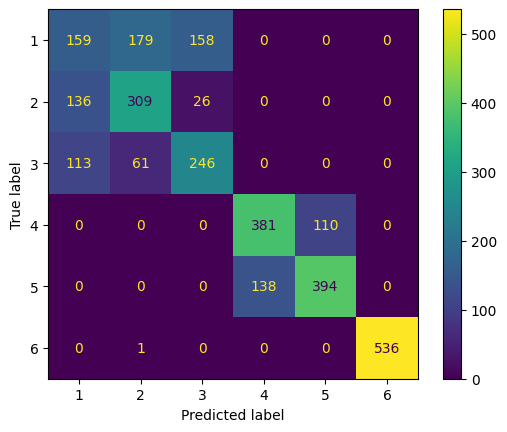

In [34]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test_df)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [42]:
X_train = pd.read_csv("uci_har_dataset/x_train.csv", index_col=["order", "subject_train"], sep=",")
X_test = pd.read_csv("uci_har_dataset/x_test.csv", index_col=["order", "subject_test"], sep=",")
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_df, test_size=.25, random_state=2360873)
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(X_train, y_train)

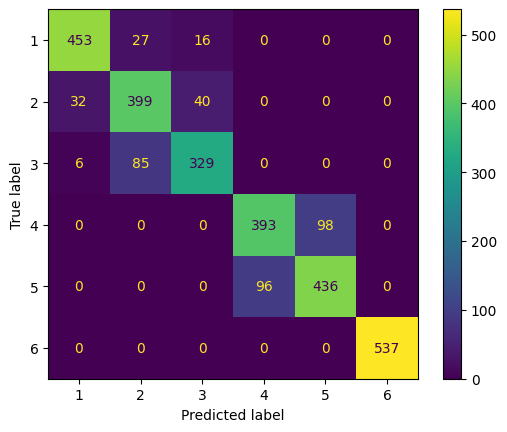

In [47]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test_df)